In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm, binom, geom

## (i) About Retail mart:
1. This project centres around a well-known American multinational retail corporation.
2. Thus corporation manaages a chain of supercenters, discount departmental stores, and grocery stores ascross the United States.

## (ii) Business Problems:
1. The main aim of this project is to examine customer purchasing behavior in relation to various attributes, providing valuable insights to aid in informed business decisions.
2. To ascertain whether there are variations in spending patterns between male and female customers.
3. Do women spend more on Black Friday than men

In [2]:
df1=pd.read_csv('mart.txt')
df=df1.copy()

## A. Data Exploration

### 1. Shape of data
1. There are 550068 rows and 10 columns.

In [3]:
df.shape

(550068, 10)

### 2. First 5-Rows

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### 3. Last 5-Rows

In [5]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


### 4. Name of Columns

In [6]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

### 5. Range of index
1. Starting index=0, Last index=550068

In [7]:
df.index

RangeIndex(start=0, stop=550068, step=1)

### 6. Total number of elements in dataset

In [8]:
df.size

5500680

### 7. Checking duplicated rows

In [9]:
df[df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


### 8. Checking missing Values:

In [10]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

### 9. Dataset Information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### 10. Statistical properties 

In [12]:
df.describe(include='all').round(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.00,550068,550068,550068,550068.00,550068,550068,550068.00,550068.00,550068.00
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1003028.84,NaN,NaN,NaN,8.08,NaN,NaN,0.41,5.40,9263.97
std,1727.59,NaN,NaN,NaN,6.52,NaN,NaN,0.49,3.94,5023.07
min,1000001.00,NaN,NaN,NaN,0.00,NaN,NaN,0.00,1.00,12.00
25%,1001516.00,NaN,NaN,NaN,2.00,NaN,NaN,0.00,1.00,5823.00
50%,1003077.00,NaN,NaN,NaN,7.00,NaN,NaN,0.00,5.00,8047.00
75%,1004478.00,NaN,NaN,NaN,14.00,NaN,NaN,1.00,8.00,12054.00


### Initial Data exploration summary:
1. There are no mssing values in the data
2. Thare are 3631 unique Product_IDs, with 'P00265242' being the most frequently purchased product_ID
3. The dataset contains two different gender categories.
4. Out of 550,068 data points, 414,259 belong to the Male gender category, while the remaining are Female. The male count is higher than the female count.
5. There are 7 unique age groups, and the majority of purchases are made by individuals in the 26-35 age group.
6. There are 3 unique City Categories, with Category B having the highest occurrence.
7. There are 5 unique values for the "Stay_in_Current_City_Years" variable, with 1 being the most common value.
8. The minimum and maximum purchase amounts are 12 and 23,961, respectively, indicating a wide range of purchasing behaviors. The mean purchase amount is 9,264, and 75% of purchases are less than or equal to 12,054. This suggests that most purchases are below 12,000.
9. Some categorical variables are represented as integers, but they can be converted to character type. This includes User ID, Occupation, Marital Status, and Product Category.

### 11. Converting datatypes

In [13]:
columns=['User_ID', 'Occupation', 'Marital_Status', 'Product_Category']
df[columns]=df[columns].astype('object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


### 12. Statistical Properties(after data type conversion)

In [15]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


### Insights:
1. There are 5,891 unique users, and User ID 1001680 has the highest count.
2. The customers belong to 21 different occupations for their purchases, with Occupation 4 being the most common.
3. There are 20 unique product categories, and Product Category 5 is the most frequently occurring.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


## B. Examining how the data is distributed across unique user profiles.

In [17]:
df2=df.groupby(['User_ID'])['Age'].unique()
(df2.value_counts()/len(df2)).round(3)

Age
[26-35]    0.348
[36-45]    0.198
[18-25]    0.181
[46-50]    0.090
[51-55]    0.082
[55+]      0.063
[0-17]     0.037
Name: count, dtype: float64

#### Insight:
1. 34.8% of the users are aged between 26-35years.
2. 19.8% of the users are aged between 36-45 years.
3. 18.1% of the users are aged between 18-25years.
4. Cumulatively, 72.7% of the purchasing is done by the users aged between 18-45years.

In [18]:
df2=df.groupby(['User_ID'])['Gender'].unique()
(df2.value_counts()/len(df2)).round(3)

Gender
[M]    0.717
[F]    0.283
Name: count, dtype: float64

#### Insight:
1. 71.7% are Male users and 28.3% are Female users.

In [19]:
df2=df.groupby(['User_ID'])['Marital_Status'].unique()
(df2.value_counts()/len(df2)).round(3)

Marital_Status
[0]    0.58
[1]    0.42
Name: count, dtype: float64

#### Insight:
1. 58% users are single and 42% are married users. 

In [20]:
df2=df.groupby(['User_ID'])['City_Category'].unique()
(df2.value_counts()/len(df2)).round(3)

City_Category
[C]    0.533
[B]    0.290
[A]    0.177
Name: count, dtype: float64

#### Insight:
1. 53.3% of the users belong to city category C whereas 29% to category B and 17.7% belong to category A.

## C. Analysing variables contributing to purchase 

#### 1. Checking how genders are contributing towards total purchase amount

In [21]:
df2=pd.DataFrame(df.groupby(['Gender'])[['Purchase']].sum())
df2['percent'] = (df2['Purchase'] / df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Gender,,
F,1186232642,23.278576
M,3909580100,76.721424


Male users contributes to more than 76.72 % of the total purchase amount whereas Female users contributes 23.28% of the total purchase amount.

#### 2. Checking how purchase value are spread among differnt age categories

In [22]:
df2=pd.DataFrame(df.groupby(['Age'])[['Purchase']].sum())
df2['percent'] = (df2['Purchase'] / df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Age,,
0-17,134913183,2.647530
18-25,913848675,17.933325
26-35,2031770578,39.871374
36-45,1026569884,20.145361
46-50,420843403,8.258612
51-55,367099644,7.203947
55+,200767375,3.939850


Users aged between 26-35 years old contributes maximum to purchase value.

#### 3. Checking how marital_status are contributing towards purchase amount

In [23]:
df2=pd.DataFrame(df.groupby(['Marital_Status'])['Purchase'].sum())
df2['percent'] = (df2['Purchase'] / df2['Purchase'].sum()) * 100
df2 

,Purchase,percent
Marital_Status,,
0,3008927447,59.047057
1,2086885295,40.952943


Single users are contributing 59% towards the total purchase amount in comparison to 41% by married users.

#### 4. Checking how City_Category are contributing towards purchase amount

In [24]:
df2=pd.DataFrame(df.groupby(['City_Category'])['Purchase'].sum())
df2['percent'] = (df2['Purchase'] / df2['Purchase'].sum()) * 100
df2 

,Purchase,percent
City_Category,,
A,1316471661,25.834381
B,2115533605,41.515136
C,1663807476,32.650483


#### 5. Checking how Occupations are contributing towards purchase amount

In [25]:
df2=pd.DataFrame(df.groupby(['Occupation'])[['Purchase']].sum())
df2['percent'] = (df2['Purchase'] / df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Occupation,,
0,635406958,12.469198
1,424614144,8.332609
2,238028583,4.671062
3,162002168,3.179123
4,666244484,13.074352
5,113649759,2.230258
6,188416784,3.697482
7,557371587,10.937835
8,14737388,0.289206


 Occupation like 0, 4, 7 has contributed more towards total purchase amount.

#### 6. Checking how Occupations are contributing towards purchase amount

In [26]:
df2=pd.DataFrame(df.groupby(['Product_Category'])[['Purchase']].sum())
df2['percent'] = (df2['Purchase'] / df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Product_Category,,
1,1910013754,37.482024
2,268516186,5.269350
3,204084713,4.004949
4,27380488,0.537313
5,941835229,18.482532
6,324150302,6.361111
7,60896731,1.195035
8,854318799,16.765114
9,6370324,0.125011


1, 8, 5 are among the highest yielding product categories and 19, 20, 13 are among the lowest in terms of their contribution to total amount.

#### 7. Checking how Stay_in_Current_city are contributing towards purchase amount

In [27]:
df2=pd.DataFrame(df.groupby(['Stay_In_Current_City_Years'])[['Purchase']].sum())
df2['percent'] = (df2['Purchase'] / df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Stay_In_Current_City_Years,,
0,682979229,13.402754
1,1792872533,35.183250
2,949173931,18.626547
3,884902659,17.365290
4+,785884390,15.422160


## D. Univariate analysis 

<Axes: xlabel='Marital_Status', ylabel='count'>

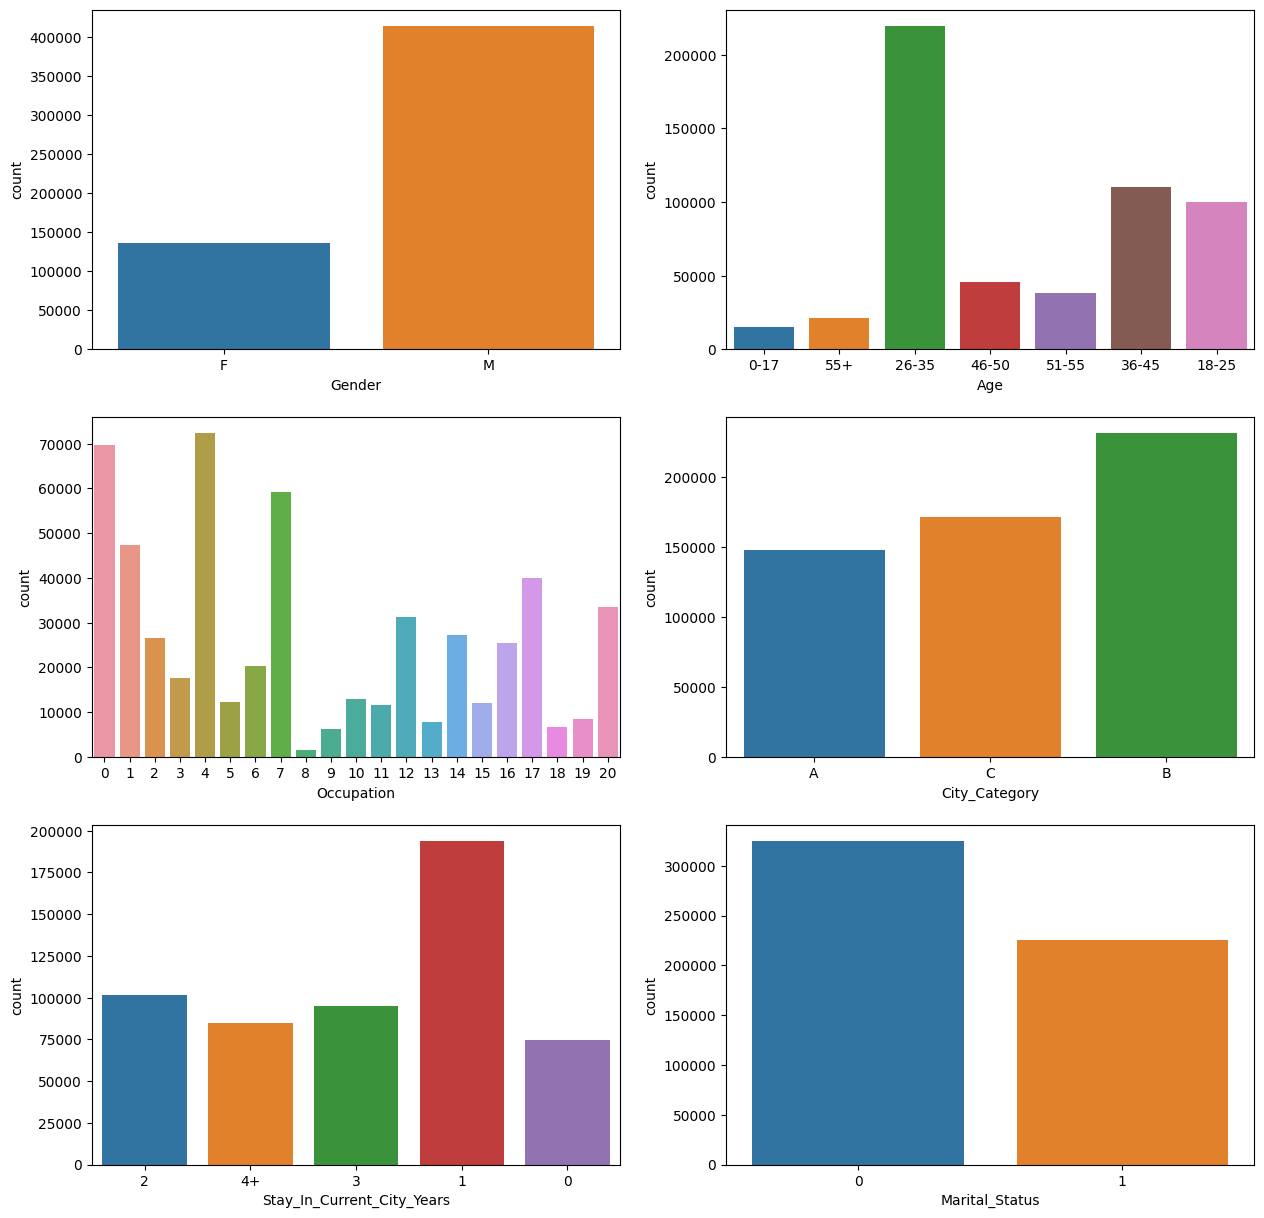

In [28]:
fig,axes=plt.subplots(nrows=3, ncols=2, figsize=(15,15))
sns.countplot(data=df, x='Gender', ax=axes[0,0])
sns.countplot(data=df, x='Age', ax=axes[0,1])
sns.countplot(data=df, x='Occupation', ax=axes[1,0])
sns.countplot(data=df, x='City_Category', ax=axes[1,1])
sns.countplot(data=df, x='Stay_In_Current_City_Years', ax=axes[2,0])
sns.countplot(data=df, x='Marital_Status', ax=axes[2,1])

### Insights:
1. Men have made significantly more purchases than women.
2. There are seven different age categories. The age group between 26 and 35 years has made the most purchases, while those under 17 years have made the fewest.
3. We have 21 occupation categories. Occupation categories 4, 0, and 7 have the highest number of purchases, while category 8 has the lowest.
4. The highest number of purchases comes from City category B.
5. Customers who have been living in the current city for 1 year have made the most purchases.
6. Single customers have made more purchases than married ones.

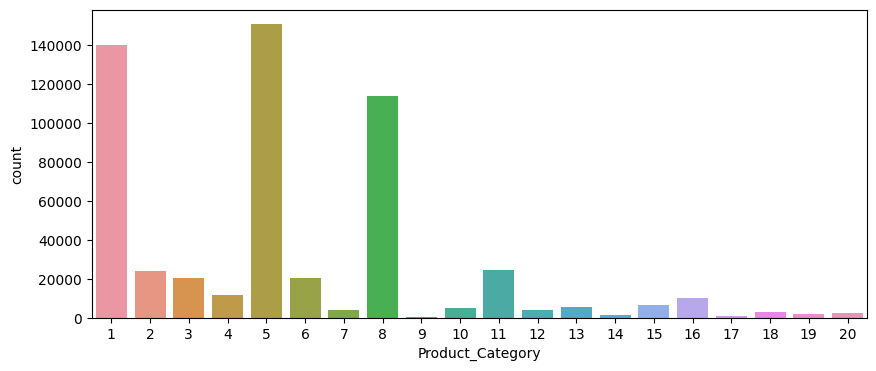

In [29]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Product_Category')
plt.show()

### Insights:
1. There are 20 product categories, and categories 1, 5, and 8 are the most commonly purchased.

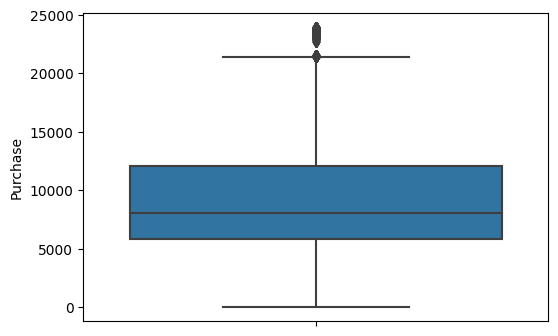

In [30]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Purchase')
plt.show()

We can see there are few outliers in the data for purchase.

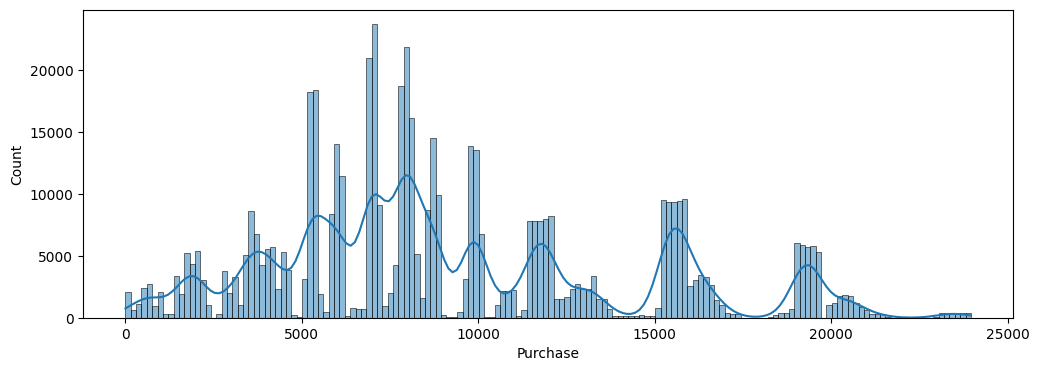

In [31]:
plt.figure(figsize=(12, 4))
sns.histplot(data=df, x="Purchase", kde=True)
plt.show()

We observe that there is a higher frequency of purchase values falling in the range of 5,000 to 10,000. 

## E. Bivariate analysis 

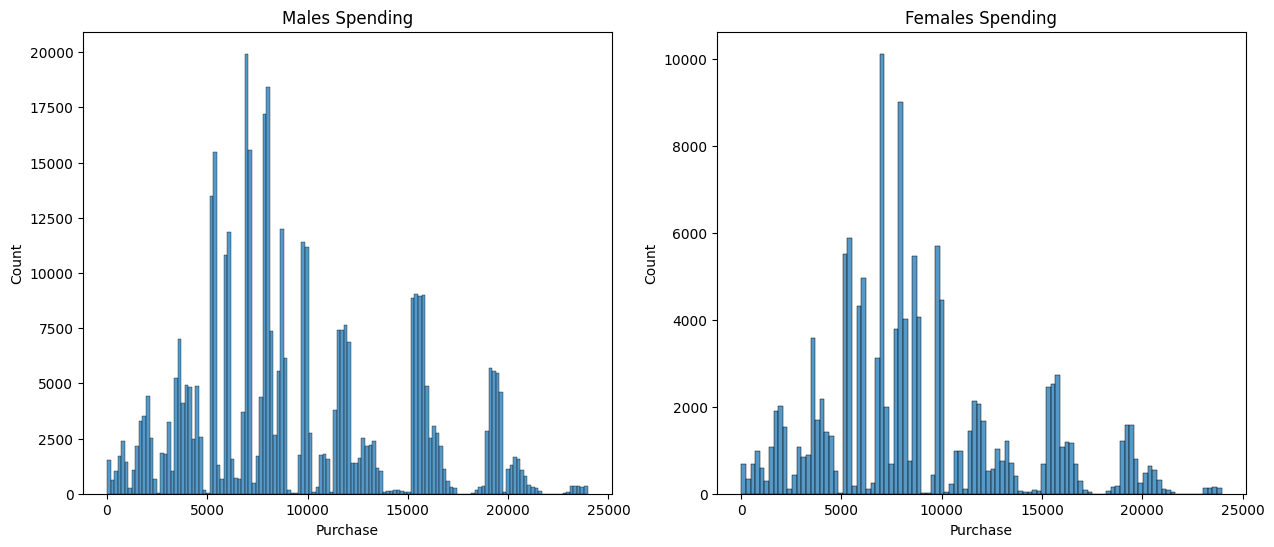

In [32]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.histplot(data=df[df['Gender']=='M']['Purchase'], ax=axes[0]).set_title('Males Spending')
sns.histplot(data=df[df['Gender']=='F']['Purchase'], ax=axes[1]).set_title('Females Spending')
plt.show()

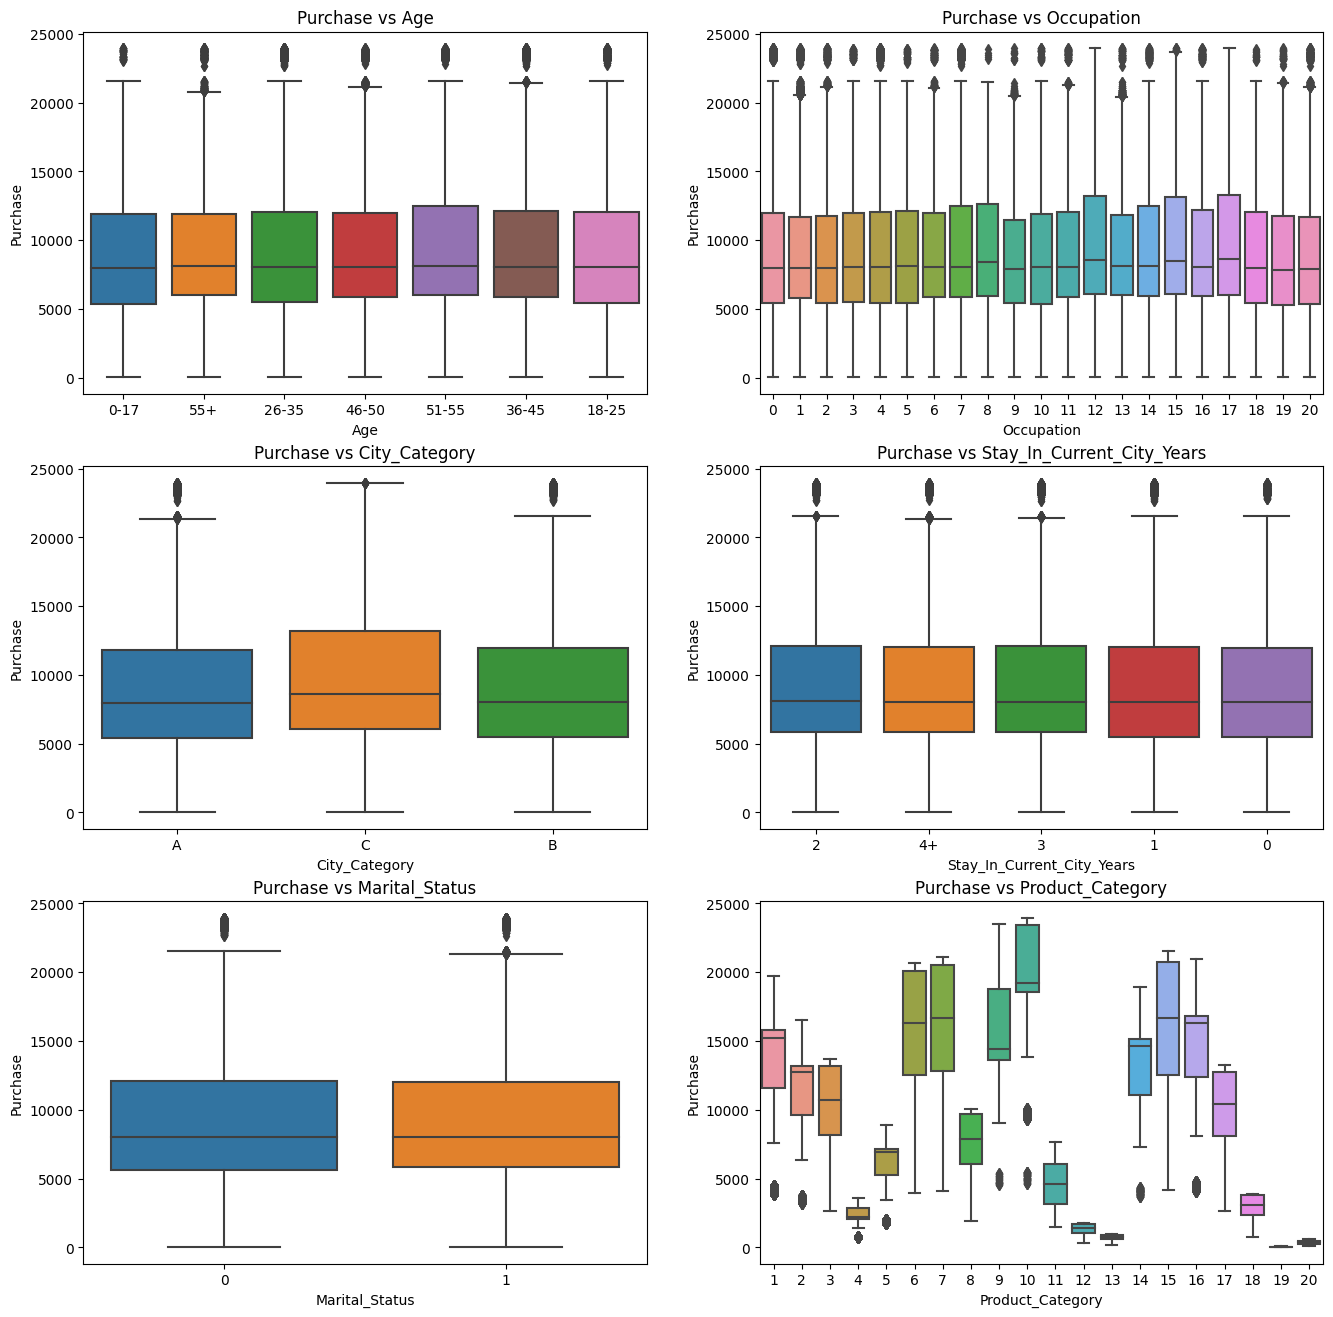

In [33]:
attr = ['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attr[count], ax=axes[row, col],)
        axes[row,col].set_title(f"Purchase vs {attr[count]}")
        count += 1
plt.show()

#### Insights:
1. Across various age groups, we observe similar buying patterns. In all age categories, most purchases fall within the range of 5,000 to 12,000, but there are a few outliers as well.
2. Similarly, when we look at different occupations, we notice similar purchasing behavior in terms of the amounts spent on purchases.
3. The same spending trend between 5,000 to 12,000 is observed across different City_Category, Stay_In_Current_City_Years, and Marital_Status among users.
4. However, there are variations among product categories. Product category 10 contains the most expensive products, and there are some outliers in certain product categories.

## F. Multi-variate analysis:

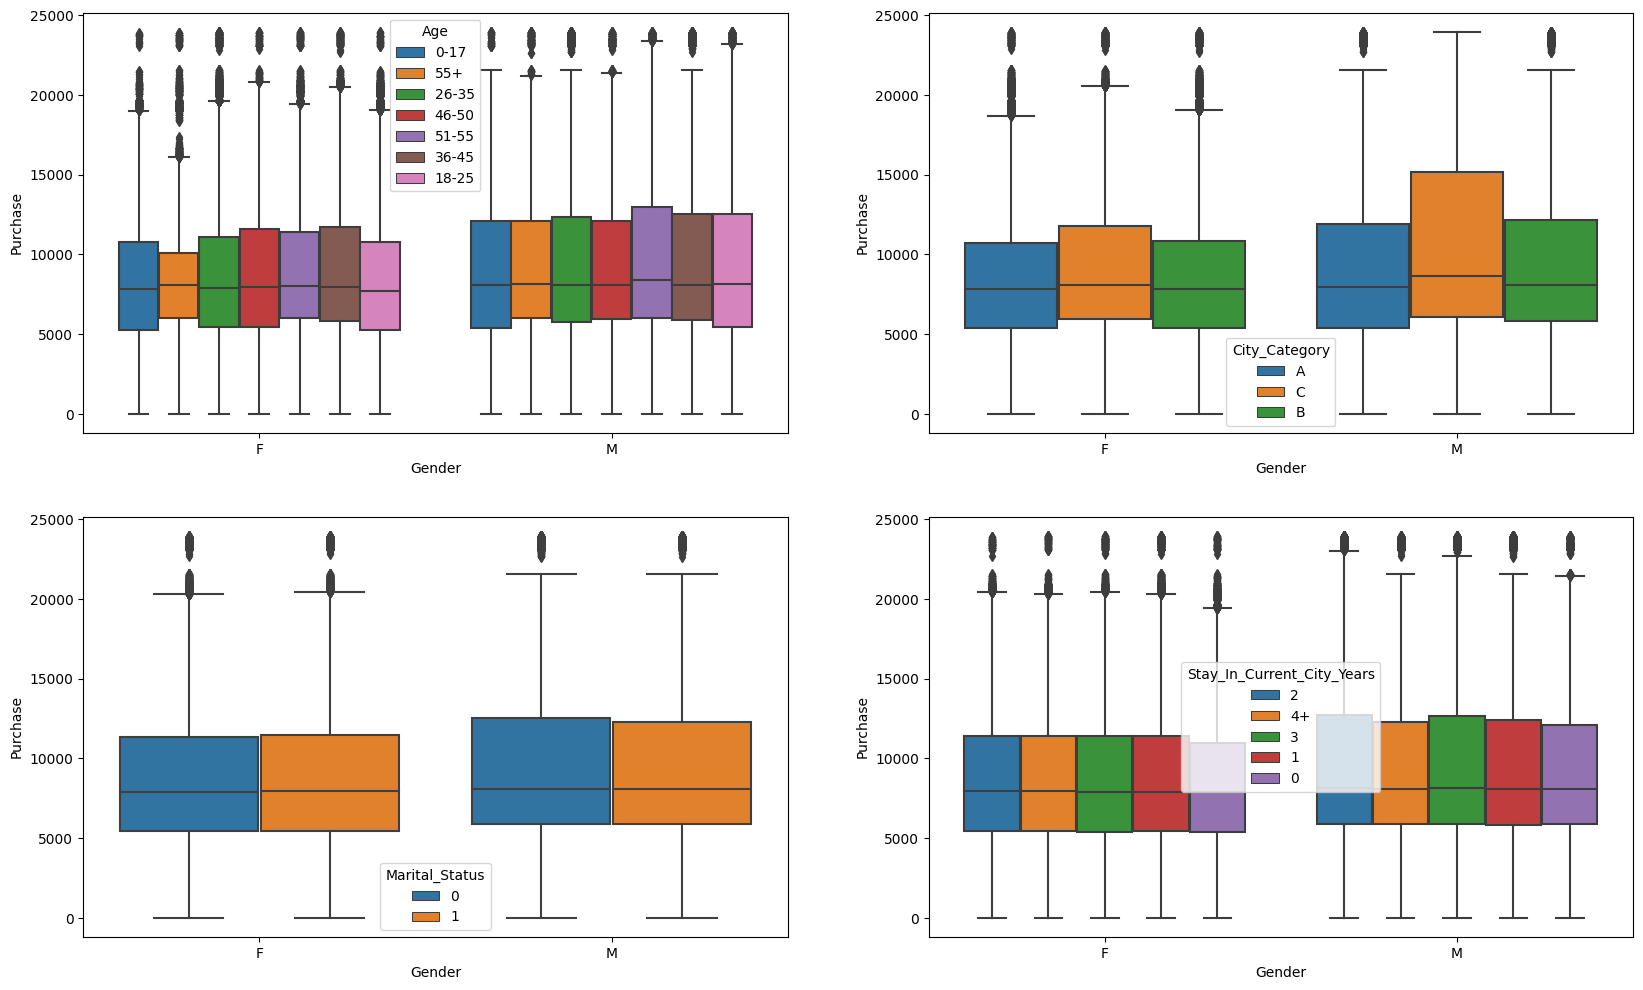

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', ax=axes[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', ax=axes[0,1])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', ax=axes[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', ax=axes[1,1])

plt.show()

#### Insights:
1. The buying habits are quite alike for both men and women, even when considering different age groups.
2. The purchasing behavior of men and women across various city categories is also quite similar. However, men from City Category B tend to buy more expensive products compared to women.
3. Whether they are single or married, the spending patterns of men and women remain quite similar.
4. When looking at the length of time staying in the current city, the purchase amounts are similar for both men and women. Although, men tend to buy slightly more high-value products.

#### Correlation between categorical variables

<Axes: >

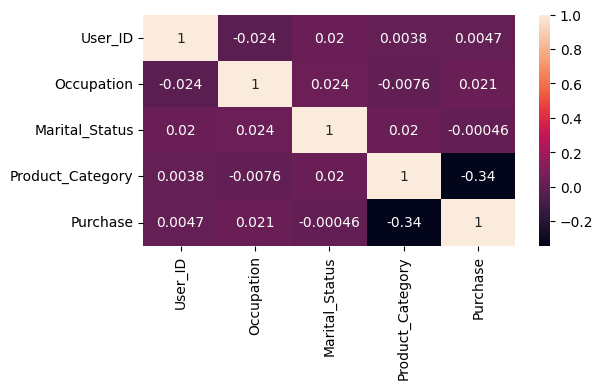

In [35]:
plt.figure(figsize=(6,3))
df_2=df[['User_ID','Occupation','Marital_Status','Product_Category','Purchase']]
correlation_matrix=df_2.corr()
sns.heatmap(correlation_matrix, annot=True)

From the above correlation plot, we can conclude that correlation is not significant between any pair of variables.

## G. CLT and Confidence Interval considering 'gender'

In [36]:
avgamt_gender = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
avgamt_gender = avgamt_gender.reset_index()
avgamt_gender

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [37]:
avgamt_gender['Gender'].value_counts()

Gender
M    4225
F    1666
Name: count, dtype: int64

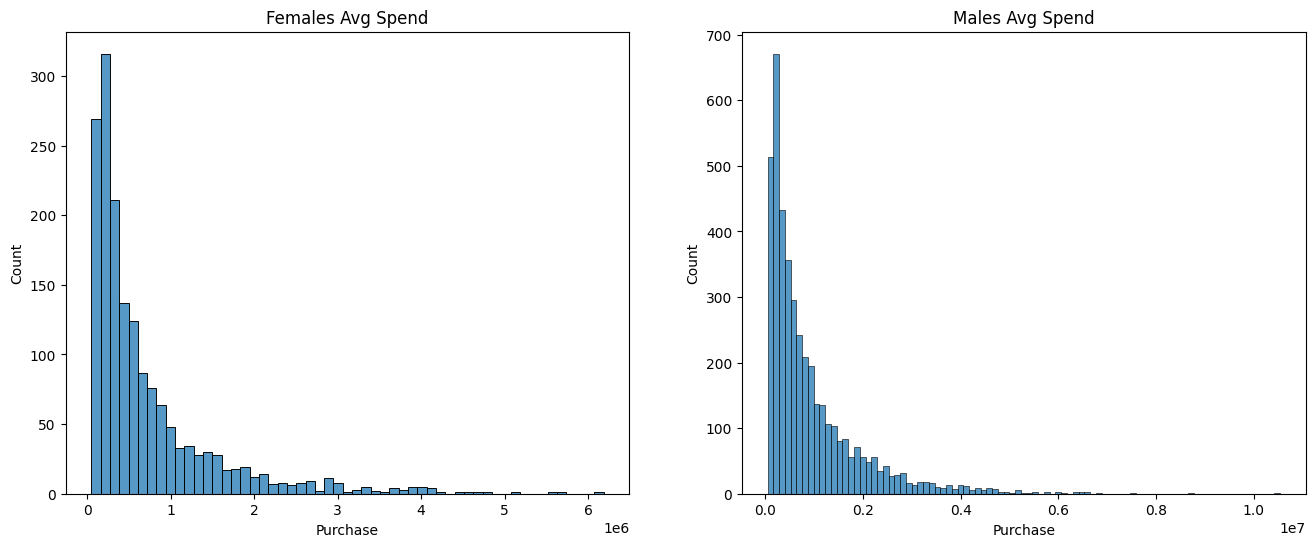

In [38]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
sns.histplot(data=avgamt_gender[avgamt_gender['Gender']=='F']['Purchase'], ax=axs[0]).set_title("Females Avg Spend")
sns.histplot(data=avgamt_gender[avgamt_gender['Gender']=='M']['Purchase'], ax=axs[1]).set_title("Males Avg Spend")
plt.show()

Average amount spend by males are higher than females. 

In [39]:
avgamt_gender.groupby(['Gender'])[['Purchase']].mean()

,Purchase
Gender,
F,712024.394958
M,925344.402367


In [40]:
avgamt_gender.groupby(['Gender'])['Purchase'].sum()

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

1. Average amount for the males is 925344 for the entire population whereas it's much lesser for females(712024).
2. Total amount spend by males is around 4 billion whereas for females it's 1.2 billion.   

In [41]:
avgamt_male = avgamt_gender[avgamt_gender['Gender']=='M']
avgamt_female = avgamt_gender[avgamt_gender['Gender']=='F']

#### Finding the sample(sample size=1000) for avg purchase amount for males and females 

In [42]:
genders = ["M", "F"]
sample_size = 1000
num_repitions = 1000
male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = avgamt_male.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean = avgamt_female.sample(sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)

In [43]:
male_means[:5]

[998713.536, 911543.401, 954867.53, 917749.849, 894113.36]

In [44]:
female_means[:5]

[697852.805, 680643.546, 693955.114, 680069.661, 684885.828]

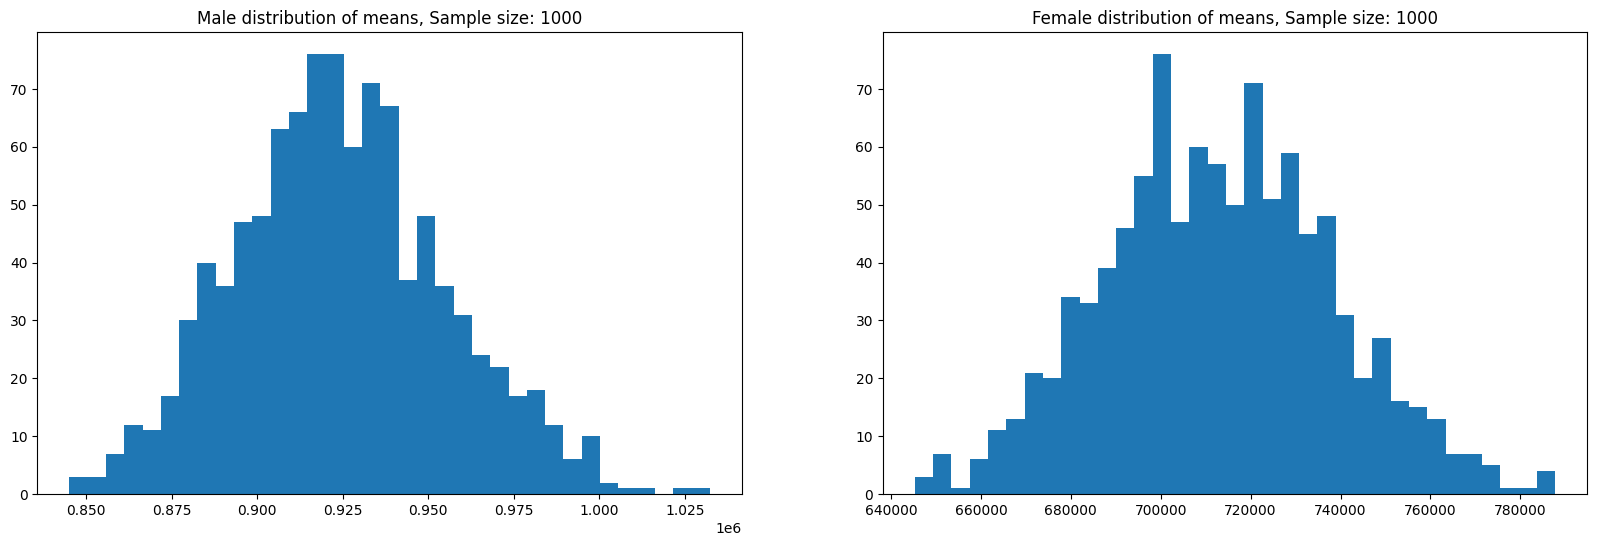

In [45]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male distribution of means, Sample size: 1000")
axis[1].set_title("Female distribution of means, Sample size: 1000")

plt.show()

The sample means seems to be normally distributed for both males and females. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem. 

#### i. Calculating 90% confidence interval for sample size 1000:

In [46]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male: {:.2f}".format(avgamt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avgamt_female['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1000))) 
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1000)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1000)
sample_std_error_female=sample_std_female/np.sqrt(1000)

Upper_Limit_male=z90*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z90*sample_std_error_male

Upper_Limit_female=z90*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z90*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])


Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 924414.31
Sample avg spend amount for Female: 712822.94

Sample std for Male: 30799.50
Sample std for Female: 25363.44

Sample std error for Male: 973.97
Sample std error for Female: 802.06

Male_CI:  [922812.1330368362, 926016.4802691637]
Female_CI:  [711503.5456331727, 714142.3314028274]


##### Now using the Confidence interval at 90%, we can say that:
1. Average amount spend by male customers lie in the range 9,22,940.71 - 9,26,225.18
2. Average amount spend by female customers lie in range 7,10,425.64 - 7,13,064.55

#### ii.Calculating 95% confidence interval for sample size 1000:

In [47]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male: {:.2f}".format(avgamt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avgamt_female['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1000))) 
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1000)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1000)
sample_std_error_female=sample_std_female/np.sqrt(1000)

Upper_Limit_male=z95*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z95*sample_std_error_male

Upper_Limit_female=z95*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z95*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 924414.31
Sample avg spend amount for Female: 712822.94

Sample std for Male: 30799.50
Sample std for Female: 25363.44

Sample std error for Male: 973.97
Sample std error for Female: 802.06

Male_CI:  [922505.3338337409, 926323.279472259]
Female_CI:  [711250.8959318227, 714394.9811041774]


##### Now using the Confidence interval at 95%, we can say that:
1. Average amount spend by male customers lie in the range 9,22,626.24 - 9,26,539.65
2. Average amount spend by female customers lie in range 7,10,172.98 - 7,13,317.21

#### iii. Calculating 99% confidence interval for sample size 1000:

In [48]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male: {:.2f}".format(avgamt_male['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(avgamt_female['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1000))) 
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1000)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1000)
sample_std_error_female=sample_std_female/np.sqrt(1000)

Upper_Limit_male=z99*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z99*sample_std_error_male

Upper_Limit_female=z99*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z99*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 924414.31
Sample avg spend amount for Female: 712822.94

Sample std for Male: 30799.50
Sample std for Female: 25363.44

Sample std error for Male: 973.97
Sample std error for Female: 802.06

Male_CI:  [921905.3709476881, 926923.2423583118]
Female_CI:  [710756.8254047384, 714889.0516312617]


##### Now using the Confidence interval at 99%, we can say that:
1. Average amount spend by male customers lie in the range 9,22,011.28 - 9,27,154.61
2. Average amount spend by female customers lie in range 7,09,678.88 - 7,13,811.31

## H. CLT and Confidence Interval considering 'marital status'

In [49]:
avg_Marital = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
avg_Marital = avg_Marital.reset_index()
avg_Marital

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [50]:
avgamt_married = avg_Marital[avg_Marital['Marital_Status']==1]
avgamt_single = avg_Marital[avg_Marital['Marital_Status']==0]

In [51]:
sample_size = 1000
num_repitions = 1000
married_means = []
single_means = []

for i in range(num_repitions):
    avg_married = avg_Marital[avg_Marital['Marital_Status']==1].sample(sample_size, replace=True)['Purchase'].mean()
    avg_single = avg_Marital[avg_Marital['Marital_Status']==0].sample(sample_size, replace=True)['Purchase'].mean()
    
    married_means.append(avg_married)
    single_means.append(avg_single)

In [52]:
married_means[:5]

[850374.795, 790666.676, 907786.562, 887917.247, 816338.197]

In [53]:
single_means[:5]

[894266.168, 867370.226, 892059.822, 867933.023, 863286.785]

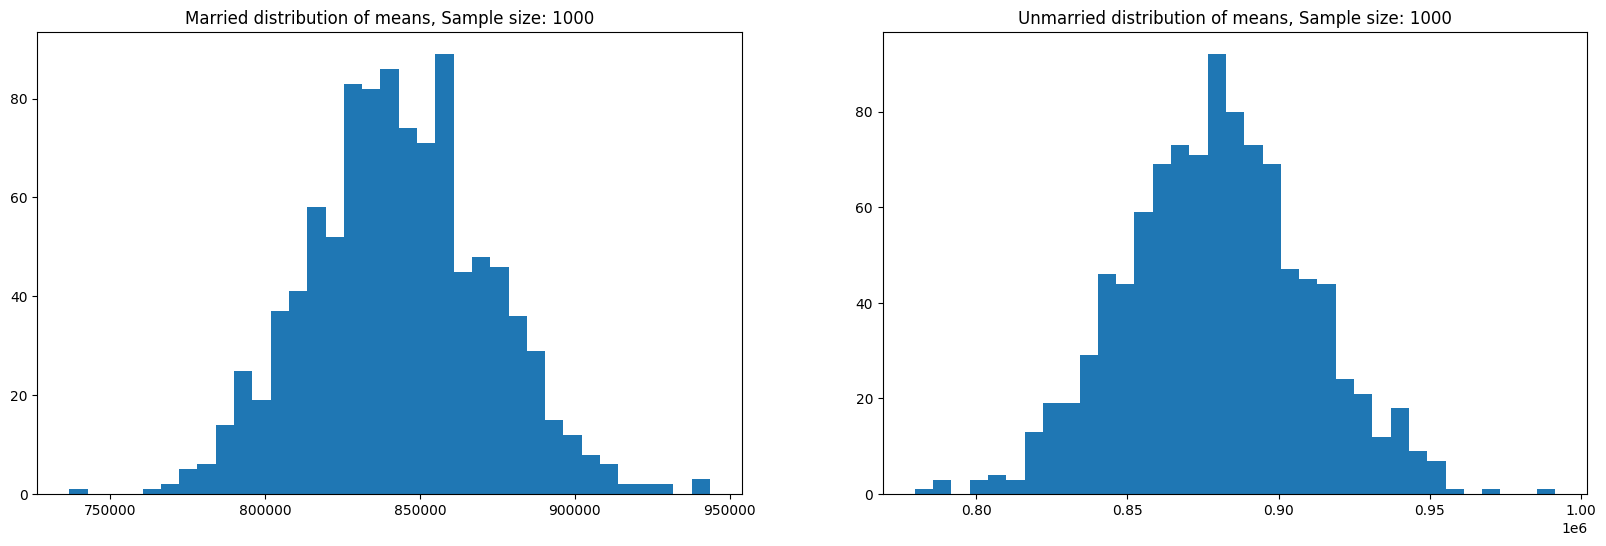

In [54]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(married_means, bins=35)
axis[0].set_title("Married distribution of means, Sample size: 1000")
axis[1].hist(single_means, bins=35)
axis[1].set_title("Unmarried distribution of means, Sample size: 1000")
plt.show()

The sample means seems to be normally distributed for both married and singles. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.

In [55]:
avg_Marital['Marital_Status'].value_counts()

Marital_Status
0    3417
1    2474
Name: count, dtype: int64

#### i. Calculating 90% confidence interval for avg expenses for married/single for sample size 1000:

In [56]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

In [57]:
print("Population avg spend amount for Single: {:.2f}\n".format(avgamt_single['Purchase'].mean()))

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(single_means)))

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(single_means).std()))

print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std()/np.sqrt(1000))) 
print("Sample std error for Single: {:.2f}\n".format(pd.Series(single_means).std()/np.sqrt(1000)))

sample_mean_married=np.mean(married_means)
sample_mean_single=np.mean(single_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(single_means).std()

sample_std_error_married=sample_std_married/np.sqrt(1000)
sample_std_error_single=sample_std_single/np.sqrt(1000)

Upper_Limit_married=z90*sample_std_error_male + sample_mean_married
Lower_Limit_married=sample_mean_married - z90*sample_std_error_married

Upper_Limit_single=z90*sample_std_error_single + sample_mean_single
Lower_Limit_single=sample_mean_single - z90*sample_std_error_single

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])

Population avg spend amount for Single: 880575.78

Sample avg spend amount for Married: 843219.18
Sample avg spend amount for Single: 879449.52

Sample std for Married: 29036.54
Sample std for Single: 30386.20

Sample std error for Married: 918.22
Sample std error for Single: 960.90

Married_CI:  [841708.716114046, 844821.3551531638]
Single_CI:  [877868.8470085376, 881030.1948634625]


#### ii. Calculating 95% confidence interval for avg expenses for married/single for sample size 1000:

In [58]:
print("Population avg spend amount for Married: {:.2f}".format(avgamt_married['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(avgamt_single['Purchase'].mean()))

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(single_means)))

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(single_means).std()))

print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std()/np.sqrt(1000))) 
print("Sample std error for Single: {:.2f}\n".format(pd.Series(single_means).std()/np.sqrt(1000)))

sample_mean_married=np.mean(married_means)
sample_mean_single=np.mean(single_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(single_means).std()

sample_std_error_married=sample_std_married/np.sqrt(1000)
sample_std_error_single=sample_std_single/np.sqrt(1000)

Upper_Limit_married=z95*sample_std_error_male + sample_mean_married
Lower_Limit_married=sample_mean_married - z95*sample_std_error_married

Upper_Limit_single=z95*sample_std_error_single + sample_mean_single
Lower_Limit_single=sample_mean_single - z95*sample_std_error_single

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])

Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

Sample avg spend amount for Married: 843219.18
Sample avg spend amount for Single: 879449.52

Sample std for Married: 29036.54
Sample std for Single: 30386.20

Sample std error for Married: 918.22
Sample std error for Single: 960.90

Married_CI:  [841419.4780543315, 845128.154356259]
Single_CI:  [877566.1647671086, 881332.8771048915]


#### iii. Calculating 99% confidence interval for avg expenses for married/single for sample size 1000:

In [59]:
print("Population avg spend amount for Married: {:.2f}".format(avgamt_married['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(avgamt_single['Purchase'].mean()))

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(single_means)))

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(single_means).std()))

print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std()/np.sqrt(1000))) 
print("Sample std error for Single: {:.2f}\n".format(pd.Series(single_means).std()/np.sqrt(1000)))

sample_mean_married=np.mean(married_means)
sample_mean_single=np.mean(single_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(single_means).std()

sample_std_error_married=sample_std_married/np.sqrt(1000)
sample_std_error_single=sample_std_single/np.sqrt(1000)

Upper_Limit_married=z99*sample_std_error_male + sample_mean_married
Lower_Limit_married=sample_mean_married - z99*sample_std_error_married

Upper_Limit_single=z99*sample_std_error_single + sample_mean_single
Lower_Limit_single=sample_mean_single - z99*sample_std_error_single

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])

Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

Sample avg spend amount for Married: 843219.18
Sample avg spend amount for Single: 879449.52

Sample std for Married: 29036.54
Sample std for Single: 30386.20

Sample std error for Married: 918.22
Sample std error for Single: 960.90

Married_CI:  [840853.8569597785, 845728.1172423118]
Single_CI:  [876974.2528283142, 881924.7890436859]


For married and singles, it can be seen with larger sample size the sample mean gets closer to tthe population mean. And at greater confidence interval, the range increases.

## I. CLT and Confidence Interval considering 'Age'

In [60]:
avgamt_age = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
avgamt_age = avgamt_age.reset_index()
avgamt_age['Age'].value_counts()

Age
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: count, dtype: int64

In [61]:
sample_size = 200
num_repitions = 1000

all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []
    
for i in age_intervals:
    for j in range(num_repitions):
        
        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)

#### i. Calculating 90% confidence interval for avg expenses for different age groups for sample size 200: 

In [62]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):
        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[i].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = avgamt_age[avgamt_age['Age']==val] 
    
    std_error = z90*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 confidence interval of means: (952206.28, 1027112.35)
For age 36-45 confidence interval of means: (832398.89, 926932.53)
For age 18-25 confidence interval of means: (810187.65, 899538.59)
For age 46-50 confidence interval of means: (726209.00, 858888.57)
For age 51-55 confidence interval of means: (703772.36, 822629.48)
For age 55+ confidence interval of means: (487032.92, 592361.57)
For age 0-17 confidence interval of means: (542320.46, 695415.16)


#### ii. Calculating 95% confidence interval for avg expenses for different age groups for sample size 200:

In [63]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):
        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[i].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = avgamt_age[avgamt_age['Age']==val] 
    
    std_error = z95*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 confidence interval of means: (945034.42, 1034284.21)
For age 36-45 confidence interval of means: (823347.80, 935983.62)
For age 18-25 confidence interval of means: (801632.78, 908093.46)
For age 46-50 confidence interval of means: (713505.63, 871591.93)
For age 51-55 confidence interval of means: (692392.43, 834009.42)
For age 55+ confidence interval of means: (476948.26, 602446.23)
For age 0-17 confidence interval of means: (527662.46, 710073.17)


#### iii. Calculating 99% confidence interval for avg expenses for different age groups for sample size 200:

In [64]:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):
        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[i].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = avgamt_age[avgamt_age['Age']==val] 
    
    std_error = z99*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 confidence interval of means: (931009.46, 1048309.18)
For age 36-45 confidence interval of means: (805647.89, 953683.53)
For age 18-25 confidence interval of means: (784903.24, 924823.00)
For age 46-50 confidence interval of means: (688663.50, 896434.06)
For age 51-55 confidence interval of means: (670138.33, 856263.52)
For age 55+ confidence interval of means: (457227.15, 622167.34)
For age 0-17 confidence interval of means: (498997.92, 738737.71)


 We can see the sample means are closer to the population mean for the differnt age groups. And, with greater confidence interval we have the upper limit and lower limit range increases. As we have seen for gender and marital status, by increasing the sample size we can have the mean of the sample means closer to the population. 

## Recommendations:
1. Men outspend women, suggesting an opportunity for the company to retain and attract more male customers

2. Product Categories 1, 5, and 8 exhibit the highest purchase frequencies, indicating strong demand for products in these categories. The company should consider increasing its offerings in these product categories.

3. Unmarried customers tend to spend more than their married counterparts. Therefore, the company should prioritize customer acquisition strategies targeting unmarried individuals

4. Customers in the age 26-35 spend more money than the others, So company should focus on acquisition of customers who are in the age 26-35.

5. The majority of customers aged 26-35 reside in City Categories B and A. To boost business, the company should concentrate on catering to this demographic in these specific cities.

6. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.

7. Some of the Product category like 19,20,13 have very less purchase. Company can think of dropping it.

8. The top 10 users who have purchased more company should give more offers and discounts so that they can be retained and can be helpful for companies business. 

9. The occupation which are contributing more company can think of offering credit cards or other benefits to those customers by liasing with some financial partners to increase the sales.

10. The top products should be given focus in order to maintain the quality in order to further increase the sales of those products.

11. People who are staying in city for an year have contributed to 35% of the total purchase amount. Company can focus on such customer base who are neither too old nor too new residents in the city.

12. We have highest frequency of purchase order between 5k and 10k, company can focus more on these mid range products to increase the sales.

#### Que1: Are women spending more money per transaction than men? Why or Why not?
1. No. Because CI's of male and female do not overlap and also  upper limits of female purchase CI are lesser than lower limits of male purchase CI. This proves that men usually spend more than women  

##### The reason for less purchase by women could have several factors:
1. Salary can be a factor in less purchase.
2. may be lesser female-based products
3. may be males doing the purchase for their female partner.

#### Que 2: Confidence intervals and distribution of the mean of the expenses by female and male customers.

1. At Confidence interval at 90%: 
    
a. Average amount spend by male customers : [9,22,940.71 - 9,26,225.18]
b. Average amount spend by female customers: [7,10,425.64 - 7,13,064.55]

2. At Confidence interval at 95%:
    
a. Average amount spend by male customers: [9,22,626.24 - 9,26,539.65]
b. Average amount spend by female customers: [7,10,172.98 - 7,13,317.21]

3. Confidence interval at 99%:

a. Average amount spend by male customers: [9,22,011.28 - 9,27,154.61]
b. Average amount spend by female customers: [7,09,678.88 - 7,13,811.31]

#### Que 3: Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?
1. No. Confidence intervals of average male and female spending are not overlapping.
2. This trend can be changed via introducing female centric marketing strategies by Walmart so that more female customers are attracted to increase female purchases to achieve comparable statistics close to 50%.

#### Que 4: Results when the same activity is performed for Married vs Single

i. At 90% CI:
Married_CI:  [842283.82, 845464.27]
Single_CI:  [879613.00, 882660.65]

ii. At 95% CI:
Married_CI:  [841988.61, 845778.09]
Single_CI:  [879321.21, 882952.44]

iii. At 99% CI:
Married_CI:  [841411.33, 846391.78]
Single_CI:  [878750.58, 883523.06]

#### Que 5: Results when the same activity is performed for Age

At 99% Confidence Interval with sample size 200

1. For age 26-35 confidence interval of means: [931009.46, 1048309.18]
2. For age 36-45 confidence interval of means: [805647.89, 953683.53]
3. For age 18-25 confidence interval of means: [784903.24, 924823.00]
4. For age 46-50 confidence interval of means: [688663.50, 896434.06]
5. For age 51-55 confidence interval of means: [670138.33, 856263.52]
6. For age 55+ confidence interval of means: [457227.15, 622167.34]
7. For age 0-17 confidence interval of means: [498997.92, 738737.71]